In [4]:
%matplotlib inline

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage

from numpy import reshape,uint8
from scipy import misc
from skimage.transform import resize
from skimage.transform import rotate

DATAFOLDER = '../data/'
IMAGE_FOLDER = os.path.join(DATAFOLDER, 'roof_images')

In [5]:
df = pd.read_csv(os.path.join(DATAFOLDER, 'id_train.csv'))
ids = list(df['Id'])
print(len(ids))
df.head()

8000


,Id,label
0,-3935637,4
1,-2815459,3
2,-2355684,3
3,-2343303,4
4,-1981985,2


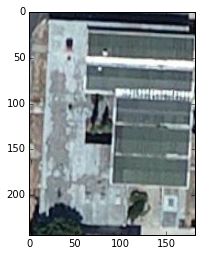

In [7]:
img_path = os.path.join(IMAGE_FOLDER, str(ids[1]) + '.jpg')
img = misc.imread(img_path)
plt.imshow(img)

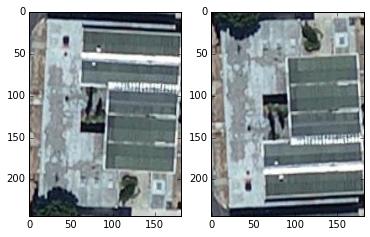

In [15]:
# horizontal flip
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(img[::-1,:,:])

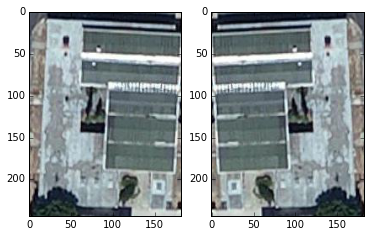

In [16]:
# Vertical flip
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(img[:,::-1,:])

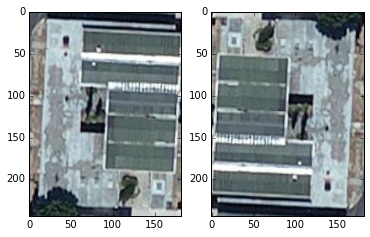

In [17]:
# Rotation 180°
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(img[::-1,::-1,:])

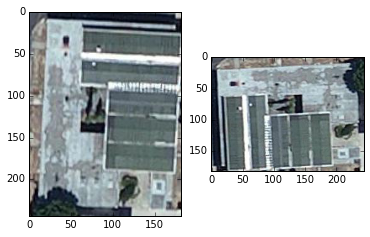

In [18]:
# Transposition
new_img = np.zeros((img.shape[1], img.shape[0], img.shape[2]),dtype='uint8')
for i in range(3):
    new_img[:,:,i] = img[:,:,i].transpose()
    
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

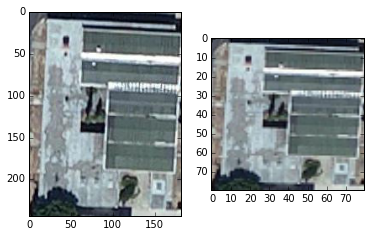

In [39]:
# Resize and crop into a square with width = 80
new_size = 80
new_img = resize(img,(new_size, new_size, 3))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

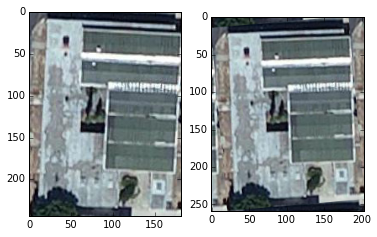

In [57]:
# Rotation
angle = 5
new_img = rotate(img, angle, resize=True, mode='wrap')

# ‘constant’, ‘edge’, ‘symmetric’, ‘reflect’, 

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)

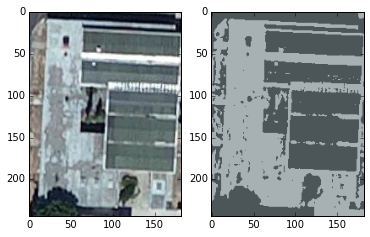

In [45]:
n_clusters = 2
w, l, d = img.shape
img_reshaped = np.reshape(img.astype(np.float32), (w * l, 3)) / 255
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(img_reshaped)
labels = kmeans.predict(img_reshaped)
new_img = np.zeros((w, l ,3))
label_idx = 0
codebook = kmeans.cluster_centers_
for i in range(w):
    for j in range(l):
        new_img[i][j] = codebook[labels[label_idx]]
        label_idx += 1

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(img)
ax2.imshow(new_img)